# Final Project: Diabetes Prediction using Machine Learning by Devras Jadhav (DJ)

## 1: Importing Libraries

In [90]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report


## 2: Load Dataset

In [91]:

projectdf = pd.read_csv("diabetes.csv")
projectdf.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


## 3: Dataset Overview

In [92]:

projectdf.info()
projectdf.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769 entries, 0 to 768
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    float64
dtypes: float64(9)
memory usage: 54.2 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 4: Exploratory Data Analysis 

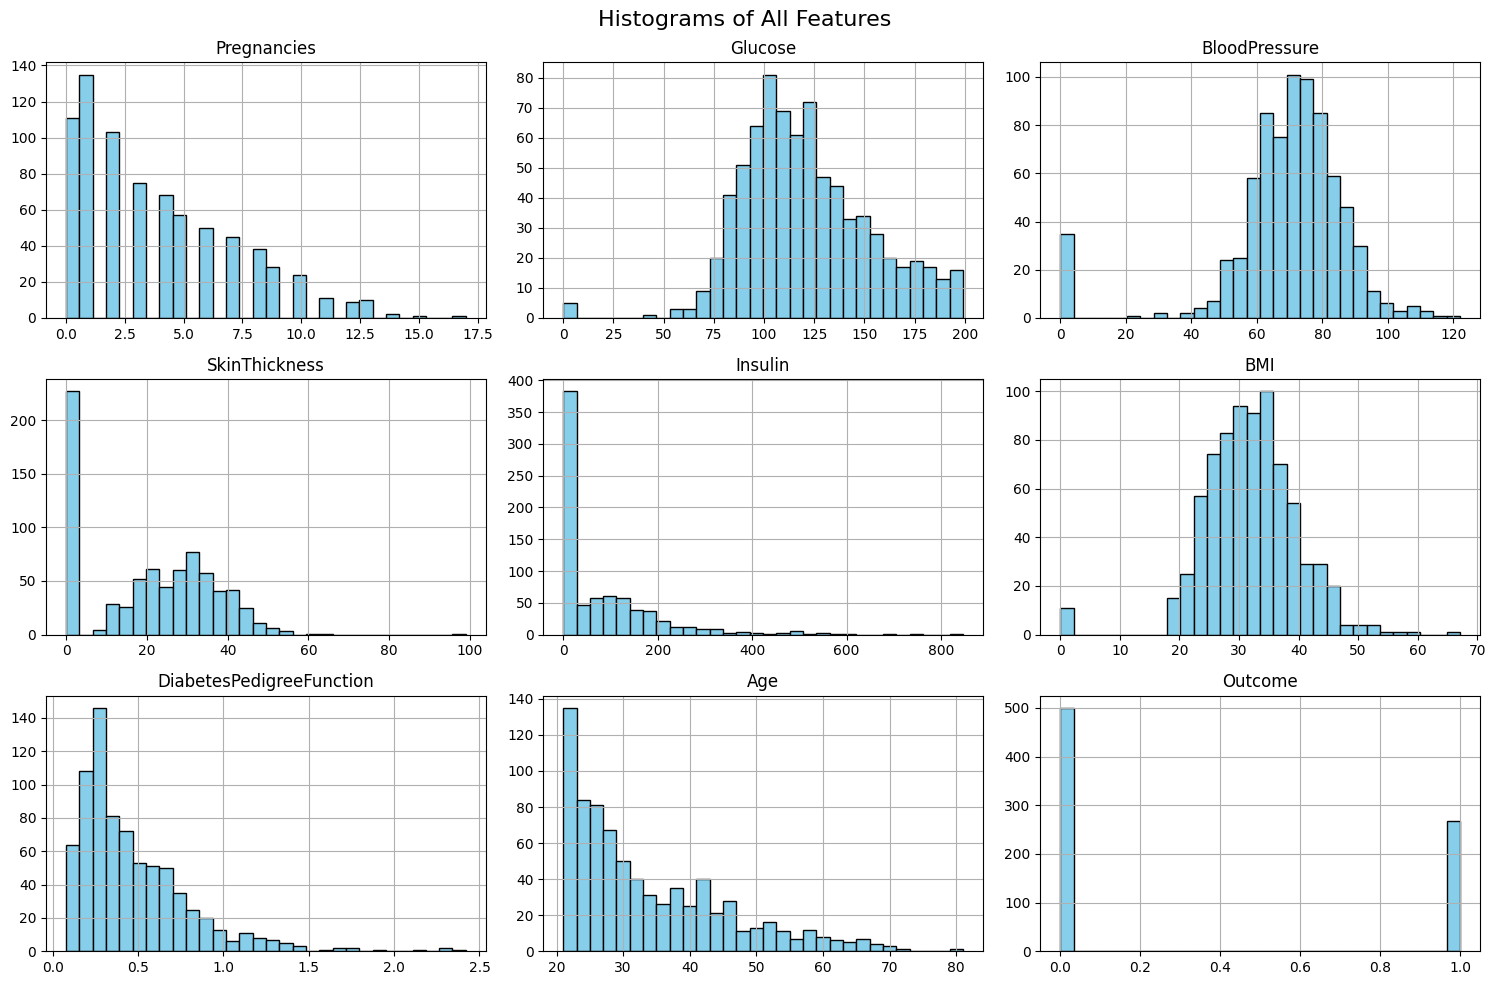

In [93]:


projectdf.hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of All Features', fontsize=16)
plt.tight_layout()
plt.show()


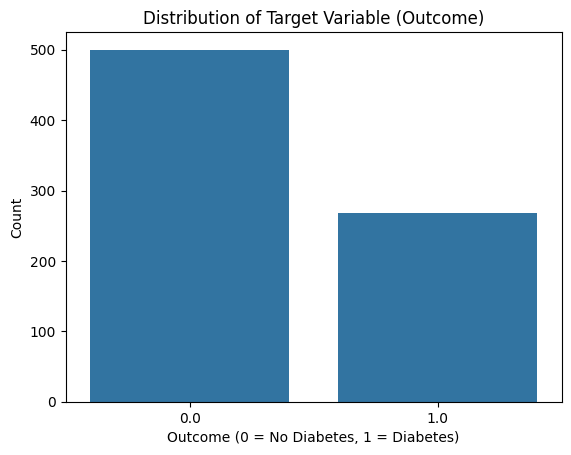

In [94]:

sns.countplot(x='Outcome', data=projectdf)
plt.title('Distribution of Target Variable (Outcome)')
plt.xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
plt.ylabel('Count')
plt.show()


## 5: Data Cleaning - Handling Missing Values

In [95]:

print("Missing values before fix:\n", projectdf.isnull().sum())
projectdf_cleaned = projectdf.dropna()


Missing values before fix:
 Pregnancies                 1
Glucose                     1
BloodPressure               1
SkinThickness               1
Insulin                     1
BMI                         1
DiabetesPedigreeFunction    1
Age                         1
Outcome                     1
dtype: int64


## 6: Feature Scaling and Train-Test Split

In [96]:

# Proper train-test split and selective scaling
X = projectdf_cleaned.drop("Outcome", axis=1)
y = projectdf_cleaned["Outcome"]

# Split before scaling to prevent data leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_tree = X_train
X_test_tree = X_test


## 7: Principal Component Analysis

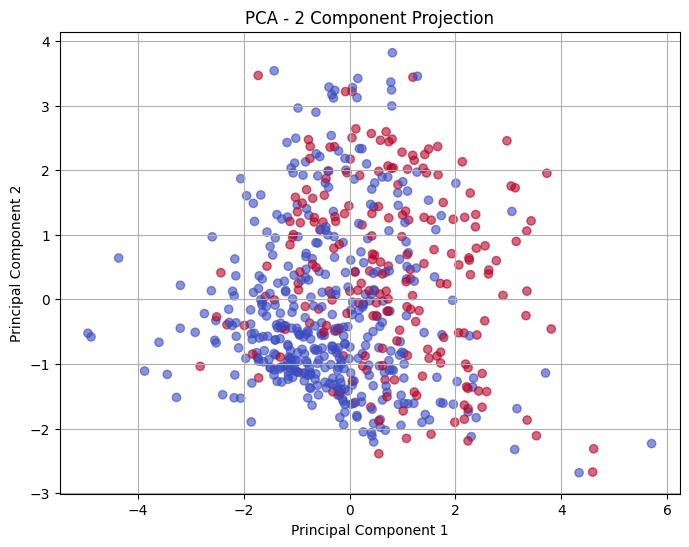

Explained variance by components: [0.25533281 0.22070281]


In [97]:
# PCA on Scaled Training Data
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)  

# Plotting PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='coolwarm', alpha=0.6)
plt.title('PCA - 2 Component Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# Explained variance
print("Explained variance by components:", pca.explained_variance_ratio_)

## 8: Model 1 - Logistic Regression

In [98]:

params_lr = {'C': [0.01, 0.1, 1, 10, 100]}
grid_lr = GridSearchCV(LogisticRegression(max_iter=1000), params_lr, cv=5)
grid_lr.fit(X_train_scaled, y_train)
lr_preds = grid_lr.predict(X_test_scaled)

print("Best Logistic Regression Params:", grid_lr.best_params_)
print("Classification Report (Logistic Regression):")
print(classification_report(y_test, lr_preds))


Best Logistic Regression Params: {'C': 10}
Classification Report (Logistic Regression):
              precision    recall  f1-score   support

         0.0       0.81      0.80      0.81        99
         1.0       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



## 9: Model 2 - Decision Tree Classifier

Decision Tree Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.76      0.79        99
         1.0       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



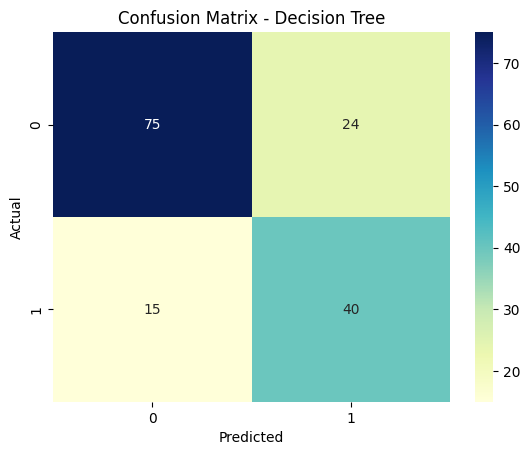

In [99]:

from sklearn.metrics import confusion_matrix
# Decision Tree using unscaled data
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_tree, y_train)

dt_preds = dt_model.predict(X_test_tree)
print("Decision Tree Classification Report:")
print(classification_report(y_test, dt_preds))

# Confusion Matrix
cm = confusion_matrix(y_test, dt_preds)
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## 10: Model 3 - Random Forest Classifier

In [100]:

params_rf = {'n_estimators': [100, 200], 'max_depth': [None, 5, 10]}
grid_rf = GridSearchCV(RandomForestClassifier(), params_rf, cv=5)
grid_rf.fit(X_train_tree, y_train)
rf_preds = grid_rf.best_estimator_.predict(X_test_tree)

print("Best Random Forest Params:", grid_rf.best_params_)
print("Classification Report (Random Forest):")
print(classification_report(y_test, rf_preds))


Best Random Forest Params: {'max_depth': 5, 'n_estimators': 200}
Classification Report (Random Forest):
              precision    recall  f1-score   support

         0.0       0.80      0.83      0.82        99
         1.0       0.67      0.64      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.76      0.76       154



## 11: Model 4 - Support Vector Classifier 

In [101]:

params_svc = {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']}
grid_svc = GridSearchCV(SVC(), params_svc, cv=5)
grid_svc.fit(X_train_scaled, y_train)
svc_preds = grid_svc.best_estimator_.predict(X_test_scaled)

print("Best SVC Params:", grid_svc.best_params_)
print("Classification Report (SVC):")
print(classification_report(y_test, svc_preds))


Best SVC Params: {'C': 1, 'gamma': 'scale'}
Classification Report (SVC):
              precision    recall  f1-score   support

         0.0       0.77      0.83      0.80        99
         1.0       0.65      0.56      0.60        55

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



## 12: Model 5 - Neural Network (MLPClassifier)

In [102]:

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp.fit(X_train_scaled, y_train)
mlp_preds = mlp.predict(X_test_scaled)

print("Classification Report (Neural Network):")
print(classification_report(y_test, mlp_preds))


Classification Report (Neural Network):
              precision    recall  f1-score   support

         0.0       0.77      0.80      0.79        99
         1.0       0.62      0.58      0.60        55

    accuracy                           0.72       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.72      0.72      0.72       154



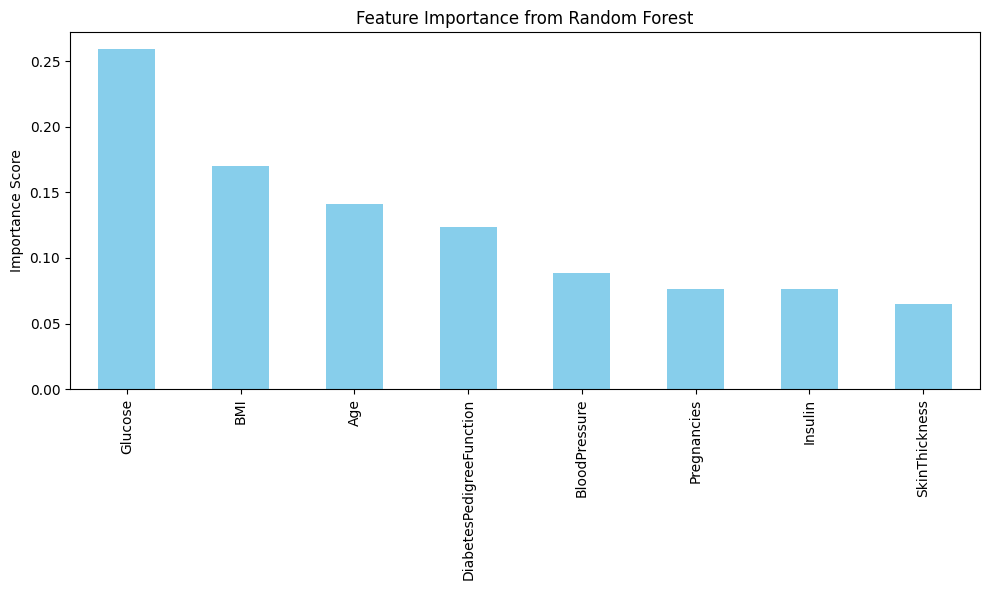

In [103]:

# Train Random Forest using unscaled data
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_tree, y_train)

# Display feature importances
importances = rf.feature_importances_
feature_names = X.columns
forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
forest_importances.plot(kind='bar', color='skyblue')
plt.title("Feature Importance from Random Forest")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()


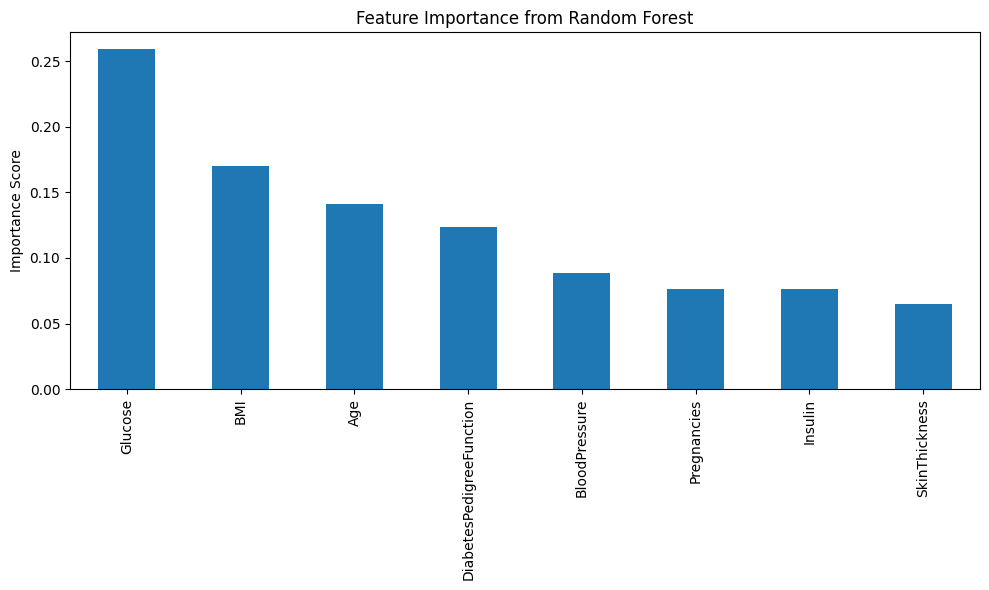

In [104]:

# Train Random Forest using unscaled data
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tree, y_train)

# Feature importance from Random Forest
importances = rf_model.feature_importances_
feature_names = X.columns
forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
forest_importances.plot(kind='bar')
plt.title("Feature Importance from Random Forest")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()
